In [9]:
from collections import Counter
from konlpy.tag import Komoran
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
%config InlineBackend.figure_format = 'retina'

#### 명사추출

In [15]:
#print Noun in sentence
#only 10 sentences

komoran = Komoran()

news = open("KCC150_100k.txt",'r',encoding='utf8')
news_lines = news.read().splitlines()

for idx, line in enumerate(news_lines):
    morph_result = komoran.pos(line) #형태소 분석
    if idx == 10:
        break
    print(line)
    for word, tag in morph_result:
        if tag.startswith('NN'): #komoran은 NNP,NNG 가 명사
            print(word, end=' ')

    print('\n') #next line

news.close()

통합보건교육은 이 대학만의 특화된 프로그램이다.
통합 보건 교육 대학 특화 프로그램 

이에 따라 전달된 후원금은 저소득층과 사회복지시설에 2억원 상당을, 중구 푸드뱅크 설립 지원에 6000만원, 저소득 긴급지원과 시설 등의 지원에 5000만원이 전해진다.
전달 후원금 소득 사회 복지 시설 원 상당 중구 푸드뱅크 설립 지원 만원 소득 긴급 지원 시설 등 지원 만원 

오리콤은 이에 모든 조직과 프로세스를 바꾸기로 했다.
조직 프로세스 

방사청은 이번 원가관리 안내서를 희망하는 기업에 무료로 배포할 예정이다.
방사 청 이번 원가 관리 안내서 희망 기업 무료 배포 예정 

그러나 이 건물은 겉에서 보는 것과는 달리 지어진 지가 꽤 오래되었는지 방이 약간 낡았다는 느낌을 주었다.
건물 겉 것 지 방 느낌 

그런데 황희찬이 다시 1부로 올라갈 수도 있다.
황희찬 부 수 

응답자 중 가장 많은 의견이었다.
응답자 중 의견 

P씨는 23일 오전 8시30분쯤 벤츠 승용차를 몰고 서울 마장동 내부순환로를 달리다 커브길에서 좌우 방호벽을 차례로 들이받았다.
씨 일 오전 시 분 쯤 벤츠 승용차 서울 마장동 내부순환로 커브 길 좌우 방호벽 차례 

니트는 당초 수능 영어를 2015년부터 대체할 계획이었지만 2019년까지 미뤄지는 등 난항을 겪어왔다.
니트 당초 수능 영어 년 대체 계획 년 등 난항 

세계 금융시장이 극심한 공포에서 잠시 벗어났다.
세계 금융 시장 공포 


### 불용어 제거하기

In [17]:
# korean_stopword.txt안에 불용어 리스트가 들어가있음
stopword_file = open("korean_stopword.txt",'r',encoding='utf8')
stopword_lines = stopword_file.read().splitlines()

korean_stopword = [line.split()[0] for line in stopword_lines]
print(len(korean_stopword))
stopword_file.close()
print(korean_stopword)

100
['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [18]:
# 불용어 테스트
sample_sent = '이 물건은 우리가 가지고 있는 것들 이다.'
sample_token = komoran.morphs(sample_sent)

output_token = []
for token in sample_token:
    if token not in korean_stopword:
        output_token.append(token)

print(output_token)

['물건', '은', '고', '는', '다', '.']


#### 단어 빈도 카운팅

In [20]:
#뉴스 단어 기준으로 빈도를 카운팅
#Counter 함수를 불러서 사용

word_count = Counter()
komoran = Komoran()

news = open("KCC150_100k.txt",'r',encoding='utf8')
news_lines = news.read().splitlines()

for line in news_lines:
    word_count.update(komoran.morphs(line))

print(len(word_count)) #전체 단어 개수 출력
print(word_count.most_common(10)) #빈도 상위 10개 출력
news.close()

59074
[('하', 109538), ('.', 99724), ('이', 86681), ('다', 75412), ('을', 72951), ('는', 66393), ('ㄴ', 66150), ('에', 50796), ('의', 45652), ('를', 42052)]


In [21]:
#파일에서 단어 기준으로 빈도 카운팅
#뉴스 기사에서 자동차 단어 찾기

car_count = Counter()
komoran = Komoran()

news = open("KCC150_100k.txt",'r',encoding='utf8')
news_lines = news.read().splitlines()

car_file = open("carDic.txt", 'r',encoding='utf8')
car_words_list = car_file.read().split('\n')

for line in news_lines:
    line = line.split() #문장 to 단어
    car_count.update([word for word in line if word in car_words_list])

print(len(car_count)) #전체 단어 개수 출력
print(car_count.most_common(10)) #빈도 상위 10개 출력
news.close()
car_file.close()

112
[('볼', 498), ('월', 121), ('암', 44), ('버스', 40), ('전원', 32), ('전기', 32), ('실내', 31), ('심', 26), ('메인', 25), ('패널', 22)]


#### Word cloud

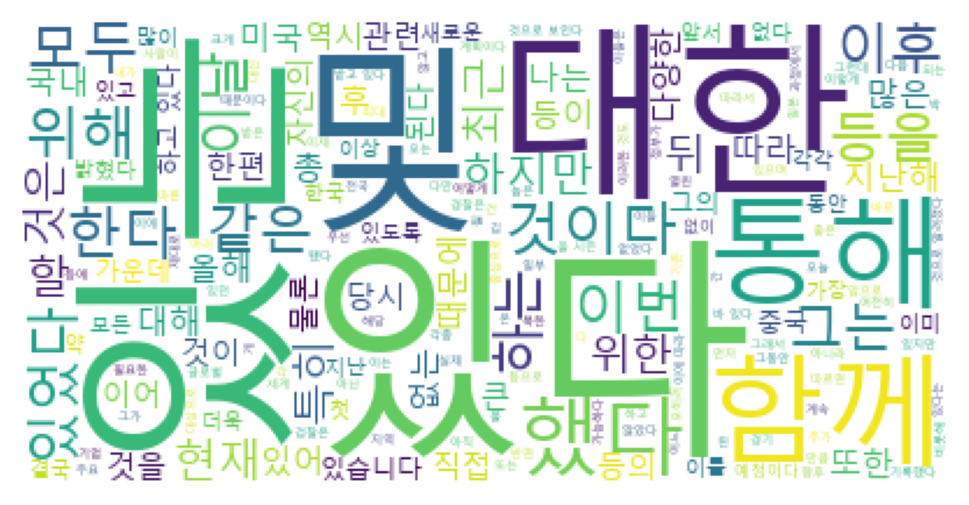

In [31]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='C:/Users/008yo/PycharmProjects/aiffel_study/1010_node/malgun.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(news_lines))

# Plot wordcloud
plt.figure(figsize=(6,4)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

In [32]:
# 형태소 분석된 결과에서 명사만 찾아 noun_sent_list를 만들어 보기
komoran = Komoran()

news = open("KCC150_100k.txt",'r',encoding='utf8')
news_lines = news.read().splitlines()

noun_sent_list = []

for idx, line in enumerate(news_lines):
    morph_result = komoran.pos(line) #형태소 분석
  
    noun_sent = ''
  
    for word, tag in morph_result:
        if tag.startswith('NN'): #komoran은 NNP,NNG 가 명사
            noun_sent += word

    noun_sent_list.append(noun_sent)

print(len(noun_sent_list))
news.close()

100000


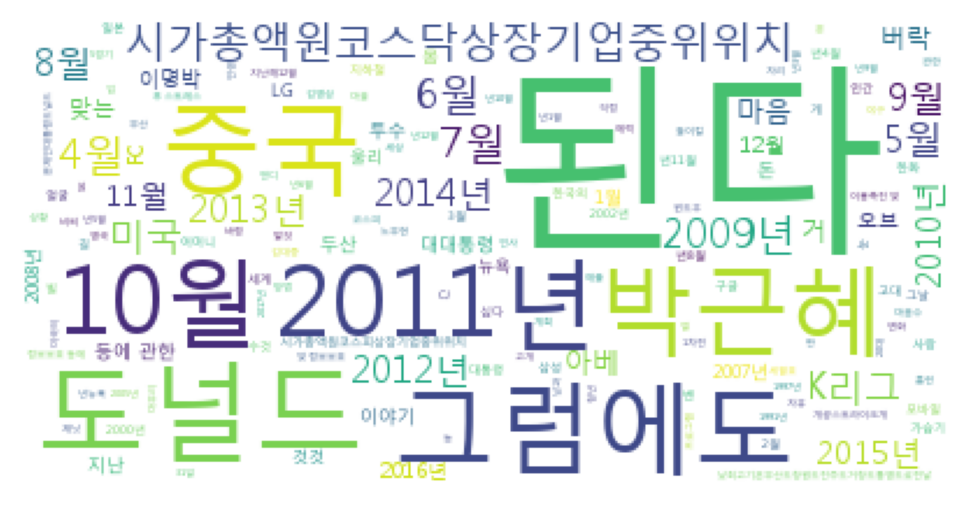

In [36]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='C:/Users/008yo/PycharmProjects/aiffel_study/1010_node/malgun.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(noun_sent_list))

# Plot wordcloud
plt.figure(figsize=(6,4)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

#### 자동차 단어만 Word cloud로 표현하기

In [39]:
# 자동차 관련 단어만 골라 car_sent_list에 담기
komoran = Komoran()

news = open("KCC150_100k.txt",'r',encoding='utf8')
news_lines = news.read().splitlines()

car_file = open("carDic.txt", 'r', encoding='utf8')
car_words_list = car_file.read().split('\n')

car_sent_list = []

for line in news_lines:
    line = line.split() #문장 to 단어
    car_sent_list.append(' '.join([word for word in line if word in car_words_list]))

print(len(car_sent_list))
news.close()
car_file.close()

100000


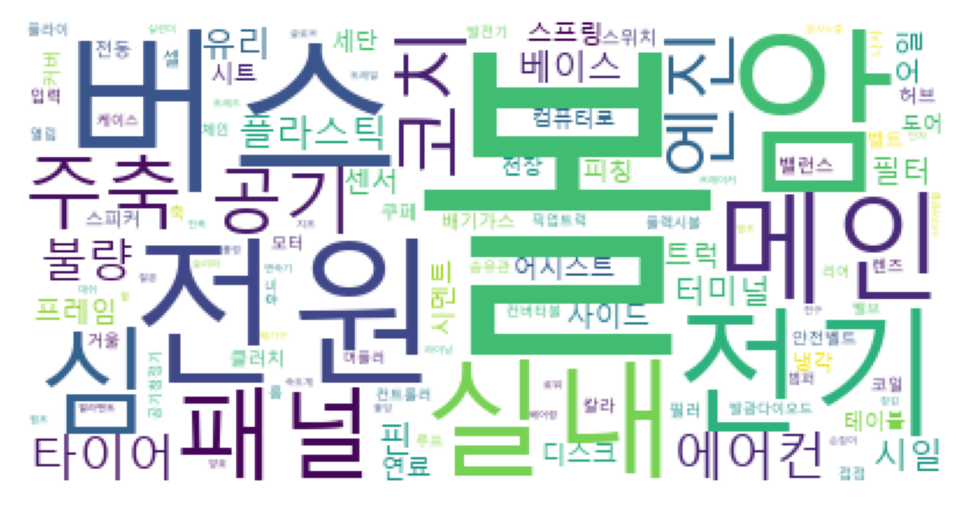

In [41]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='C:/Users/008yo/PycharmProjects/aiffel_study/1010_node/malgun.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(car_sent_list))

# Plot wordcloud
plt.figure(figsize=(6,4)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()